In [1]:
# import pandas
import pandas as pd

# import statsmodels.api as sm
import statsmodels.api as sm

# import matplotlib
import matplotlib.pyplot as plt


In [2]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

* print top 5 rows

In [3]:
co2.head(20)

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,NaN
1958-05-17,317.5
1958-05-24,317.9
1958-05-31,NaN


* Resample timeseries using monthly averages and store the new timeseries as a Series `y`

In [4]:
y = co2.resample('m').mean()

* print top 5 rows of 'y'

In [5]:
y.head(5)

,co2
1958-03-31,316.100000
1958-04-30,317.200000
1958-05-31,317.433333
1958-06-30,NaN
1958-07-31,315.625000


* check the missing values

In [13]:
y.isnull().count()

co2    526
dtype: int64

* replace missing values with last available value
    - if Feb 2010 is missing, use value from Jan 2010.

In [17]:
fill_y = y.fillna(method='ffill')

* plot timeseries `y`

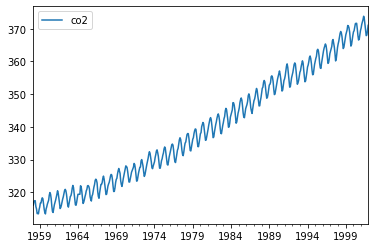

In [21]:
fill_y.plot()
plt.show()

* Apply and plot:
    - additive seasonal decomposition
    - multiplicative seasonal decomposition

Additive Model


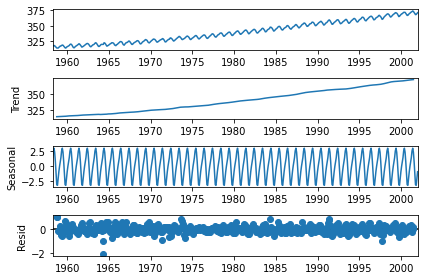

Multiplicative


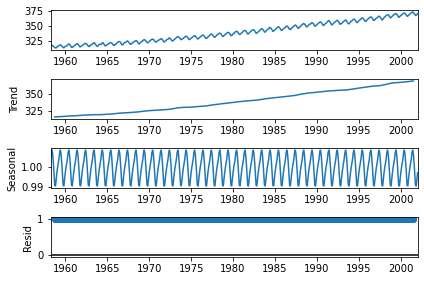

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# additive
print('Additive Model')
result = seasonal_decompose(fill_y, model='additive')
result.plot()
plt.show()

# multiplicative
print('Multiplicative')
result = seasonal_decompose(fill_y, model='multiplicative')
result.plot()
plt.show()